# Netwoks in different connectivty (g):
This notebook will set networks side by side which are different in the connectivity constant "g".
This procedure will be done with the help of engine code in __network_simulation.py__ file. It contains network object and serves its behaviours.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas() #This line make sure that the progress bars looks natural.

In [3]:
from network_simulation import Kuramoto_neural_network

In [4]:
connectivity_span = np.arange(0.1,5,0.25)
num_ensembles_each_g = 5
sigma_record = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g) )

## Creating various ensembles:

In [5]:
for i,connectivity in enumerate(tqdm( connectivity_span , desc='Variation of connectivities') ):
    for j in tqdm( range(num_ensembles_each_g) , desc='Making ensembles'):
        sample_model = Kuramoto_neural_network(num_neurons=300,g=connectivity)
        sample_model.ignite(total_time = 1000)
        sample_model.compute_effective_field( alpha = 20)
        sigma_record[i][j] = sample_model.report_sigma()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 12232.16it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 12103.75it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11595.68it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 12078.97it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10083.22it/s]


network dynamic: 100%|███████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9246.29it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10311.34it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:07<00:00, 12708.18it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 12492.78it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11935.06it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 12481.90it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10129.05it/s]


network dynamic: 100%|███████████████████████████████████████████████████████| 100000/100000 [00:12<00:00, 8140.31it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10501.44it/s]


network dynamic: 100%|███████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9971.69it/s]


network dynamic: 100%|███████████████████████████████████████████████████████| 100000/100000 [00:15<00:00, 6474.08it/s]


network dynamic: 100%|███████████████████████████████████████████████████████| 100000/100000 [00:15<00:00, 6502.47it/s]


network dynamic: 100%|███████████████████████████████████████████████████████| 100000/100000 [00:14<00:00, 6893.61it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10160.85it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10060.89it/s]


In [6]:
# sigma_record = connectivity_record
np.save('sigma_records.npy',sigma_record)

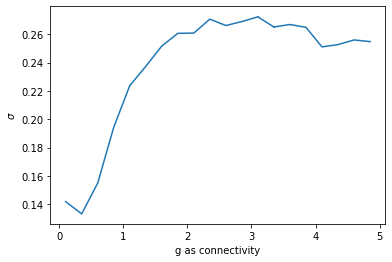

In [7]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = connectivity_span, y = np.mean(sigma_record,axis = 1),yerr = np.var(sigma_record,axis = 1))
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig('sigma_as_synchoronization_meter.png')

In [8]:
np.sum(sigma_record,axis = 0)

array([4.71180461, 4.68343377, 4.81765564, 4.71527749, 4.81101099])

In [9]:
sigma_record.shape

(20, 5)

In [10]:
sigma_record

array([[0.14164872, 0.14264001, 0.14397403, 0.14368995, 0.13716302],
       [0.13422439, 0.13417366, 0.13782477, 0.1310871 , 0.12843033],
       [0.14805461, 0.1505484 , 0.15239638, 0.15896527, 0.16470215],
       [0.18782552, 0.20933471, 0.18288022, 0.19037561, 0.2009753 ],
       [0.21228263, 0.20333523, 0.25727005, 0.2271492 , 0.21839464],
       [0.2291533 , 0.24861445, 0.22315536, 0.23937068, 0.24633881],
       [0.23992887, 0.25592393, 0.24473818, 0.26672921, 0.2509778 ],
       [0.27681275, 0.24286718, 0.28770242, 0.23131871, 0.26450042],
       [0.25370304, 0.25801471, 0.27679736, 0.25975728, 0.25589957],
       [0.29287049, 0.28994451, 0.25335177, 0.25842283, 0.25871984],
       [0.28924054, 0.24143169, 0.27190832, 0.26321992, 0.26502659],
       [0.24631308, 0.26961463, 0.27166623, 0.28051067, 0.27679316],
       [0.25769674, 0.24013298, 0.29107087, 0.27774779, 0.29479348],
       [0.2897464 , 0.25006752, 0.27475361, 0.23545468, 0.27551634],
       [0.2570975 , 0.26209256, 0.

In [11]:
sigma_record[0]

array([0.14164872, 0.14264001, 0.14397403, 0.14368995, 0.13716302])